# Computational Thinking Foundations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- [NumPy](https://numpy.org/) is an open source project that enables numerical computing with Python.
- [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python.

## Monte Carlo

There are several ways to prove that

$$
\int_0^1 \sqrt{1 - x^2} \, \text{d}x = \frac{\pi}{4}
$$

How many different approaches come to your mind?

Note this is basically the area of a quarter of circle.

In [2]:
def f(x):
  return np.sqrt(1 - x ** 2)

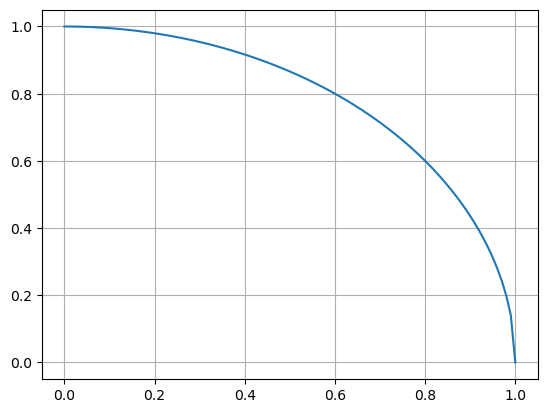

In [3]:
x_array = np.arange(0, 1 + 0.01, 0.01)
y_array = f(x_array)
plt.plot(x_array, y_array)
plt.grid()

Let's create a box that contains this function

In [4]:
x_min = 0
x_max = 1
y_min = 0
y_max = 1

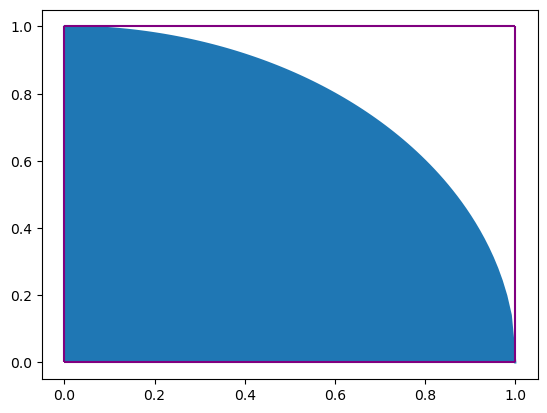

In [5]:
plt.plot(x_array, y_array)
plt.fill_between(x_array, y_array)
plt.hlines([y_min, y_max], xmin=0, xmax=1, colors="purple")
plt.vlines([x_min, x_max], ymin=0, ymax=1, colors="purple")

Let's create a random point inside the box

In [6]:
rdn_x = np.random.uniform(x_min, x_max)
rdn_y = np.random.uniform(x_min, y_max)
(rdn_x, rdn_y)

(0.6836713524929507, 0.8650595612312253)

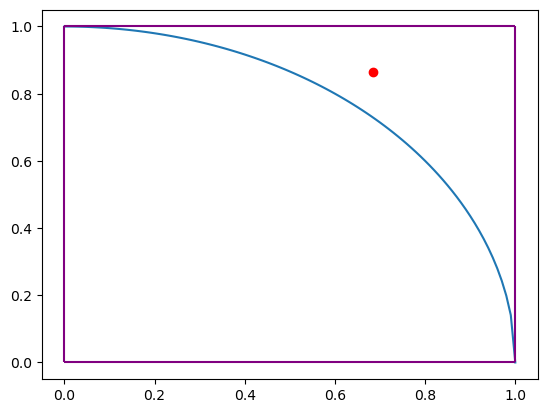

In [7]:
plt.plot(x_array, y_array)
plt.hlines([y_min, y_max], xmin=0, xmax=1, colors="purple")
plt.vlines([x_min, x_max], ymin=0, ymax=1, colors="purple")
plt.scatter(rdn_x, rdn_y, c="red")

In [8]:
n = 100  # Number of dots

area = (x_max - x_min)*(y_max - y_min)  # Area of the recangle
counter = 0                                   # Success counter
for i in range(n):
  rdn_x = np.random.uniform(x_min, x_max)
  rdn_y = np.random.uniform(x_min, y_max)
  if rdn_y <= f(rdn_x):
    counter += 1
print(counter * area / n)

0.83


In [9]:
np.pi / 4  # Real area

0.7853981633974483

Let's explore what we just did and we will take advantage of numpy

In [10]:
n = 100
rdn_x_array = np.random.uniform(x_min, x_max, size=n)  # n random elements
rdn_y_array = np.random.uniform(y_min, y_max, size=n)  # n random elements
mask = rdn_y_array <= f(rdn_x_array)  # Booleans values, trues and falses
mask

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True, False,
       False, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

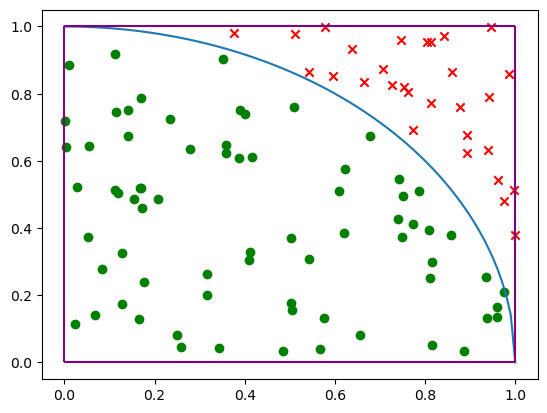

In [11]:
plt.plot(x_array, y_array)
plt.hlines([y_min, y_max], xmin=0, xmax=1, colors="purple")
plt.vlines([x_min, x_max], ymin=0, ymax=1, colors="purple")
plt.scatter(rdn_x_array[mask], rdn_y_array[mask], c="green")  # Successes
plt.scatter(rdn_x_array[~mask], rdn_y_array[~mask], c="red", marker="x")  # Fails

In [12]:
def monte_carlo_function(f, n, x_min, x_max, y_min, y_max):
  area = (x_max - x_min) * (y_max - y_min)
  rdn_x_array = np.random.uniform(x_min, x_max, size=n)
  rdn_y_array = np.random.uniform(y_min, y_max, size=n)
  mask = rdn_y_array <= f(rdn_x_array)
  counter = mask.sum()
  return counter / n * area

In [30]:
n_list = [10, 100, 1000, 10000, 100000]
repetitions = 10
x_array = []
y_array = []
for n in n_list:
  for _ in range(repetitions):
    x_array.append(n)
    area = monte_carlo_function(f, n, x_min, x_max, y_min, y_max)
    y_array.append(area)

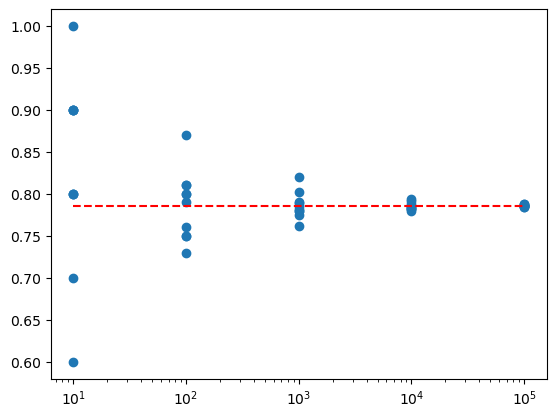

In [31]:
plt.scatter(x_array, y_array)
plt.xscale("log")
plt.hlines(np.pi / 4, xmin=n_list[0], xmax=n_list[-1], linestyles="dashed", colors="red")

## GIS - Monte Carlo

In [15]:
# !pip install geopandas geoplot

In [16]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

from shapely import Point

- [Pandas]()
- [GeoPandas]()
- [GeoPlot]()
- [Shapely]()

In [17]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


<AxesSubplot: >

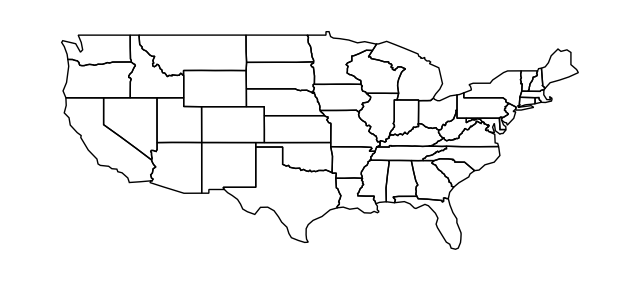

In [18]:
gplt.polyplot(contiguous_usa)

In [19]:
contiguous_usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
contiguous_usa = contiguous_usa.to_crs("ESRI:102003")

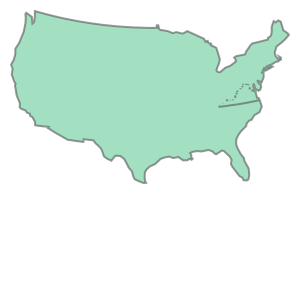

In [21]:
usa_polygon = contiguous_usa.unary_union
usa_polygon

In [22]:
min_x, min_y, max_x, max_y = usa_polygon.bounds

<AxesSubplot: >

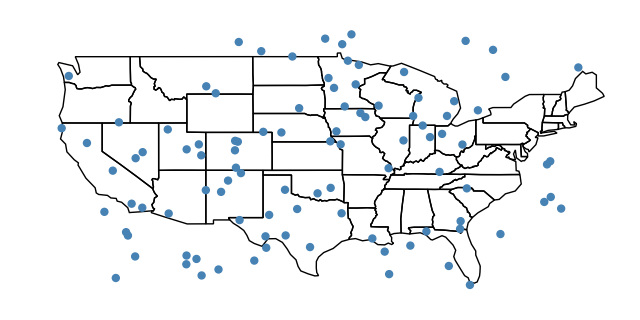

In [23]:
n = 100
dots_x = np.random.uniform(min_x, max_x, size=n)
dots_y = np.random.uniform(min_y, max_y, size=n)
points = gpd.GeoSeries.from_xy(dots_x, dots_y, crs="ESRI:102003")
ax = gplt.polyplot(contiguous_usa.to_crs("EPSG:4326"))
gplt.pointplot(points.to_crs("EPSG:4326"), ax=ax)

In [24]:
usa_polygon.area

7983252871007.093

In [25]:
n = 100
area = (max_x - min_x) * (max_y - min_y)
counter = 0
for i in range(n):
    rdn_x = np.random.uniform(min_x, max_x)
    rdn_y = np.random.uniform(min_y, max_y)
    rdn_point = Point(rdn_x, rdn_y)
    if rdn_point.within(usa_polygon):
        counter += 1
print(counter / n * area)

8697404949586.434


In [26]:
def monte_carlo_area(polygon, n):
  min_x, min_y, max_x, max_y = polygon.bounds
  area = (max_x - min_x) * (max_y - min_y)
  counter = 0
  for i in range(n):
    rdn_x = np.random.uniform(min_x, max_x)
    rdn_y = np.random.uniform(min_y, max_y)
    rdn_point = Point(rdn_x, rdn_y)
    if rdn_point.within(usa_polygon):
      counter += 1
  return counter / n * area

In [27]:
n_list = [10, 100, 1000, 10000]
repetitions = 5
x_array = []
y_array = []
for n in n_list:
  for _ in range(repetitions):
    x_array.append(n)
    area = monte_carlo_area(usa_polygon, n)
    y_array.append(area)

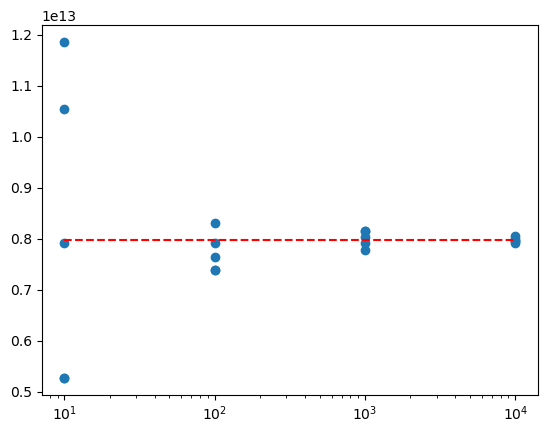

In [28]:
plt.scatter(x_array, y_array)
plt.xscale("log")
plt.hlines(usa_polygon.area, xmin=n_list[0], xmax=n_list[-1], linestyles="dashed", colors="red")